`참고: 덕성여대 Nano-degree 교과 <언어 빅데이터 이해와 활용>,<언어 빅데이터>`

```
참고문헌:
Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python: analyzing text with the natural language toolkit. " O'Reilly Media, Inc.".
이기창. 한국어 임베딩. 에이콘.
```
https://www.nltk.org/book/

# 왜 주석 말뭉치가 필요한가?

In [ ]:
import nltk

In [ ]:
# Penn Treebank 다운로드
# 1989년도 WSJ의 2,500여개의 기사를 포괄, 480만 개 토큰 규모.
# https://catalog.ldc.upenn.edu/docs/LDC95T7/cl93.html
from nltk.corpus import treebank

In [ ]:
nltk.download('treebank')

In [ ]:
treebank.raw()

In [ ]:
# 토큰 보이기
treebank.words()[:10] # sents, paras

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the']

In [ ]:
# 품사 보이기
nltk.download('universal_tagset') # https://universaldependencies.org/u/pos/
treebank.tagged_words(tagset='universal')[:10]

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET')]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.5 MB/s eta 0:00:00


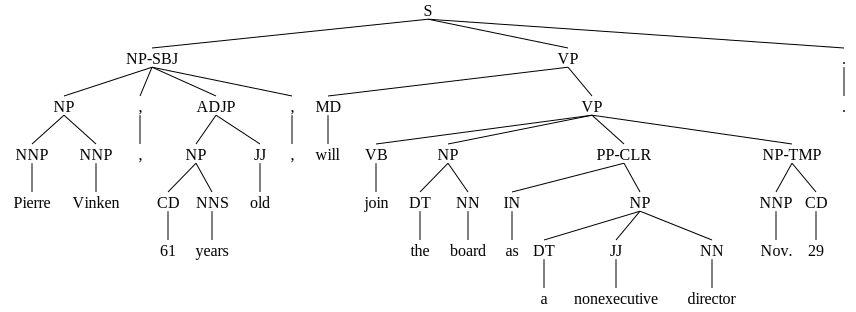

In [ ]:
!pip install svgling
# 문장 구조 보이기 - 구문 분석(Constituency Parsing)
treebank.parsed_sents()[0]

In [ ]:
# 그렇다면 토큰, 품사, 구문을 단위로 빈도 분석을 할 수도 있겠네요
from nltk.probability import FreqDist

In [ ]:
# 트리뱅크 단어 빈도표 만들기
word_freq = FreqDist(treebank.words())

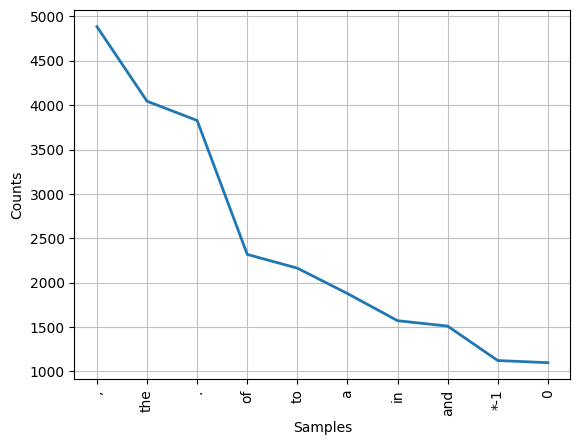

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
word_freq.plot(10)

In [ ]:
treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [ ]:
# 트리뱅크 품사 빈도표 만들기
pos_freq = FreqDist([ t for (w,t) in treebank.tagged_words()])

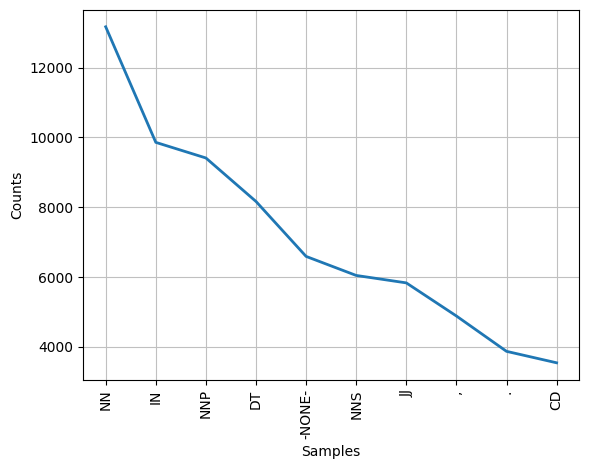

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
pos_freq.plot(10)

# 주석 말뭉치 구축
- 어떻게 대규모 텍스트를 로드할 것인가?



## Google Drive 와 연동하기

In [1]:
# 내 구글 드라이브에 연동하기 (주의:이 컴퓨터의 다른 사용자가 접근할 수 있음)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 작업 디렉토리 설정 (개인마다 다르겠죠?)
root_path='/content/drive/MyDrive/Classroom/빅데이터시스템-01'

## 1. 파일 읽기를 통해서 로드

In [ ]:
# !echo "wiki_ko_mecab.txt (tokenized file) 클릭하여 다운로드 "
# !gdown https://drive.google.com/uc?id=1Ybp_DmzNEpsBrUKZ1-NoPDzCMO39f-fx

wiki_ko_mecab.txt (tokenized file) 클릭하여 다운로드 
Downloading...
From (original): https://drive.google.com/uc?id=1Ybp_DmzNEpsBrUKZ1-NoPDzCMO39f-fx
From (redirected): https://drive.google.com/uc?id=1Ybp_DmzNEpsBrUKZ1-NoPDzCMO39f-fx&confirm=t&uuid=553fcea4-2b24-45ae-a9cc-c710c1408553
To: /content/tokenized.zip
100% 873M/873M [00:08<00:00, 102MB/s] 


In [ ]:
# 'wiki_ko_mecab.txt'의 size는 1GB가 넘는다
with open(root_path+'/data/tokenized/wiki_ko_mecab.txt') as f:
  contents = f.read()

In [ ]:
# session died
words = contents.split()

## 2. Lazy Loading
* 파일 크기가 크거나, 처리해야 하는 파일이 많거나 하는 경우, 전체를 로드하는 것은 리소스 낭비
* 전체 데이터를 한번에 로드하는 대신, 코퍼스의 특정 부분만을 메모리로 로드
* 메모리 사용량을 줄이고, 처리 속도를 향상시킴

In [ ]:
# 여러분의 해결책은???

## 3. 커스텀 주석 말뭉치 구축

#### 3.1 전처리

In [3]:
! pip install konlpy

# google colab에서 mecab을 사용하기 편하게 만들어주는 shell 파일도 실행시켜 줍니다.
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# ! cd ./Mecab-ko-for-Google-Colab
# ! bash ./Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab190912.sh
! bash ./Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh

# shell 파일 출처: https://somjang.tistory.com/entry/Google-Colab에서-Mecab-koMecab-ko-dic-쉽게-사용하기 [솜씨좋은장씨]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 32.7 MB/s eta 0:00:00
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 4.79 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-04-22 15:40:50--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 

In [ ]:
from konlpy.tag import Okt, Komoran, Mecab, Hannanum, Kkma

In [ ]:
# 토크나이저 초기화
tokenizer = Kkma()

In [ ]:
!mkdir corpus

In [ ]:
# 원본 파일
input_file = 'processed_ratings_train.txt'

# https://ratsgo.github.io/embedding/downloaddata.html 에서 다운로드 가능

#### `input_file` 형식: 댓글␞감정레이블, 총 149995개 행
---------
```
아 더빙.. 진짜 짜증나네요 목소리␞0
흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나␞1
```

##### (i) 데이터베이스에 저장하는 방법
*   메모리 부족



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(input_file, delimiter='\u241E', names = ['comments', 'labels'], encoding='utf-8', engine='python') # 실행되기도 하고 안되는 경우도 있음

FileNotFoundError: [Errno 2] No such file or directory: 'processed_ratings_train.txt'

In [ ]:
len(df)

149995

In [ ]:
df['tokenized'] = df['comments'].apply(lambda x: tokenizer.pos(x))

In [ ]:
df.head()

##### (ii) 직접 파일에 쓰는 방법

In [ ]:
tokenizer = Mecab()   # 바꾸고 싶은 것으로 바꾸기

with open(input_file, encoding='utf-8') as fr:
  for i, line in enumerate(fr, start=1):
    try:
      comment, senti = line.split('␞') # 댓글, 감정레이블로 나눔
      tokenized = tokenizer.pos(comment.strip()) # 토크나이징, 단어 분리 뿐만 아니라 품사 분리까지 진행
      tagged_sent = ' '.join(list('/'.join((w,t)) for (w,t) in tokenized) )
      senti = int(senti)
      # 폴더/파일명 설정
      # 감정 레이블이 0이면 neg, 1이면 pos
      fname = f"corpus/doc{i:03d}_{'pos' if senti else 'neg'}.txt"
      with open(fname, 'w', encoding='utf-8') as ft:
        ft.write(tagged_sent)
        ft.write('\n')
      print(i)
    except Exception as e:
      print(e)
      continue
    if i == 100: break # 전부 다 하면 15만개 정도... 오래 걸려요.

# print(tokenizer.pos(s2))
# print(' '.join(list('/'.join(wt) for wt in tokenizer.pos(s2)) ) )

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [ ]:
# 실례를 확인해 볼까요
s = '아 더빙.. 진짜 짜증나네요 목소리␞0'

# 댓글, 감정레이블로 나눔 (데이터 정제)
comment, senti = s.split('␞')

# 토큰화
tokenizer = Kkma()
tokenizer.pos(comment.strip())

[('아', 'VV'),
 ('아', 'ECS'),
 ('더빙', 'NNG'),
 ('..', 'SW'),
 ('진짜', 'MAG'),
 ('짜증나', 'VV'),
 ('네요', 'EFN'),
 ('목소리', 'NNG')]

### 3.2 주석 말뭉치 리더(TaggedCorpusReader)
* 단어, 품사, 문장, 단락별로 읽기가 가능함
* Lazy Loading을 통해 메모리 사용 최소화

In [ ]:
from nltk.corpus.reader import TaggedCorpusReader

In [ ]:
!ls corpus

doc001_neg.txt	doc018_neg.txt	doc035_pos.txt	doc052_neg.txt	doc069_pos.txt	doc086_pos.txt
doc002_pos.txt	doc019_pos.txt	doc036_pos.txt	doc053_pos.txt	doc070_neg.txt	doc087_neg.txt
doc003_neg.txt	doc020_pos.txt	doc037_neg.txt	doc054_neg.txt	doc071_neg.txt	doc088_pos.txt
doc004_neg.txt	doc021_pos.txt	doc038_pos.txt	doc055_pos.txt	doc072_pos.txt	doc089_pos.txt
doc005_pos.txt	doc022_pos.txt	doc039_neg.txt	doc056_pos.txt	doc073_neg.txt	doc090_pos.txt
doc006_neg.txt	doc023_neg.txt	doc040_pos.txt	doc057_neg.txt	doc074_pos.txt	doc091_neg.txt
doc007_neg.txt	doc024_pos.txt	doc041_pos.txt	doc058_pos.txt	doc075_neg.txt	doc092_pos.txt
doc008_neg.txt	doc025_neg.txt	doc042_neg.txt	doc059_neg.txt	doc076_neg.txt	doc093_pos.txt
doc009_pos.txt	doc026_neg.txt	doc043_pos.txt	doc060_pos.txt	doc077_pos.txt	doc094_pos.txt
doc010_pos.txt	doc027_pos.txt	doc044_pos.txt	doc061_neg.txt	doc078_neg.txt	doc095_pos.txt
doc011_pos.txt	doc028_neg.txt	doc045_pos.txt	doc062_neg.txt	doc079_neg.txt	doc096_pos.txt
doc012_pos

In [ ]:
reader = TaggedCorpusReader('corpus', r'doc.*\.txt', encoding='utf8')

In [ ]:
len(reader.fileids())

100

In [ ]:
# 토큰 보이기
reader.words()[:10] # sents, paras

['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리']

In [ ]:
# 품사 보이기
reader.tagged_words()[:10]

[('아', 'IC'),
 ('더', 'MAG'),
 ('빙', 'MAG'),
 ('.', 'SF'),
 ('.', 'SY'),
 ('진짜', 'MAG'),
 ('짜증', 'NNG'),
 ('나', 'NP'),
 ('네요', 'VCP+EC'),
 ('목소리', 'NNG')]

In [ ]:
# 그렇다면 토큰, 품사, 구문을 단위로 빈도 분석을 할 수도 있겠네요
from nltk.probability import FreqDist

In [ ]:
# 단어 빈도표 만들기
word_dist = FreqDist(reader.words())

In [ ]:
word_dist.hapaxes()     # 한 번 출연한 단어

['빙',
 '목소리',
 '초딩',
 '오버',
 '조차',
 '가볍',
 '구나',
 '밓었다그래서보는것을추천한다',
 '교도소',
 '구먼',
 '솔직히',
 '조정',
 '사이몬페그',
 '익살',
 '스런',
 '돋보였',
 '스파이더맨',
 '늙',
 '커스틴',
 '던스트',
 '이뻐',
 '보였',
 '막',
 '걸음마',
 '뗀',
 '세',
 '초등',
 '학교',
 '학년',
 '살',
 '별반',
 '개',
 '아까움',
 '원작',
 '긴장감',
 '제대로',
 '살려',
 '못했',
 '반개',
 '아깝',
 '나온다',
 '이응경',
 '길용우',
 '생활',
 '인지',
 '발',
 '해도',
 '보단',
 '낫',
 '겟',
 '납치',
 '감금',
 '가족',
 '못',
 '모엿',
 '액션',
 '케',
 '건데',
 '꽤',
 '만한데',
 '헐리우드',
 '식',
 '화려',
 '길들여져',
 '걍인피니트가짱이다',
 '짱',
 '♥',
 '마다',
 '눈물나',
 '서',
 '죽',
 '자극',
 '허진호',
 '감성',
 '절제',
 '멜로',
 '달인',
 '울',
 '손들',
 '횡단',
 '건널',
 '뛰쳐나올',
 '이범수',
 '드럽',
 '못해',
 '담백',
 '깔끔',
 '해서',
 '신문',
 '기사',
 '보다',
 '자꾸',
 '잊어버린다',
 '취향',
 '존중',
 '한다지만',
 '내생',
 '극장',
 '가장',
 '잼',
 '거지',
 '어거지',
 'ㄱ',
 '냥',
 '매번',
 '긴장',
 '참',
 '바스코',
 '이기면',
 '락스',
 '코',
 '바비',
 '이기',
 '아이돌',
 '깐다',
 '어서',
 '안달',
 '처럼',
 '보인다',
 '굿바이',
 '레닌',
 '표절',
 '이해',
 '뒤',
 '질퍽',
 '산뜻',
 '구성',
 '버',
 '무',
 '러진',
 '드',
 '!♥',
 '약탈자',
 '위한',
 '변명',
 '이라',
 '저놈',
 '착한',
 '

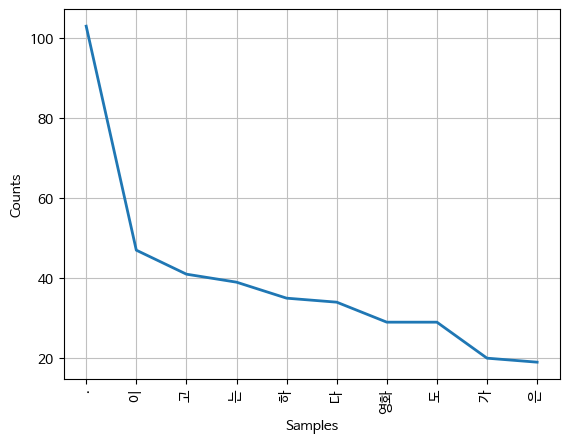

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
word_dist.plot(10)

In [ ]:
# 품사 빈도표 만들기
pos_dist = FreqDist([t for (w,t) in reader.tagged_words()])

In [ ]:
reader.tagged_words()   # 품사

[('아', 'IC'), ('더', 'MAG'), ('빙', 'MAG'), ('.', 'SF'), ...]

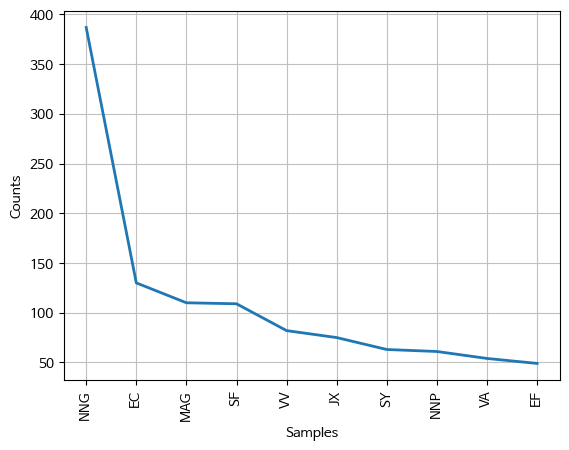

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
pos_dist.plot(10)

##### 한글 깨짐 현상 처리 - 한글 폰트 다운로드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

* 런타임 재시작 후 아래 실행

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

### 3.3 유형 말뭉치 리더(CategorizedTaggedCorpusReader)

In [ ]:
from nltk.corpus.reader import CategorizedTaggedCorpusReader

* arg `cat_pattern` : 유형의 명칭으로 삼을 문자열을 정규표현식의 하위범주화`()`로 지정한다.

In [ ]:
reader = CategorizedTaggedCorpusReader('corpus', r'doc\d+_\w+\.txt', cat_pattern=r'doc\d+_(\w+)\.txt')

In [ ]:
reader.categories()

['neg', 'pos']

* 예제 1, (Q2) `nltk.corpus.brown.categories()`의 15가지 장르별 텍스트에 대하여, 각각의 어휘 다양성 점수(TTR의 역수)를 구하세요
* 위의 브라운 코퍼스 `nltk.corpus.brown` 는 `CategorizedPlaintextCorpusReader`의 인스턴스임

In [ ]:
# 긍정(pos)과 부정(neg) 댓글이 각각 몇 개인가요?
len(reader.fileids(categories='neg'))

46

In [ ]:
# 긍정(pos)의 단어 빈도표 만들기
from nltk.probability import FreqDist
positive_dist = FreqDist(reader.words(categories='pos'))

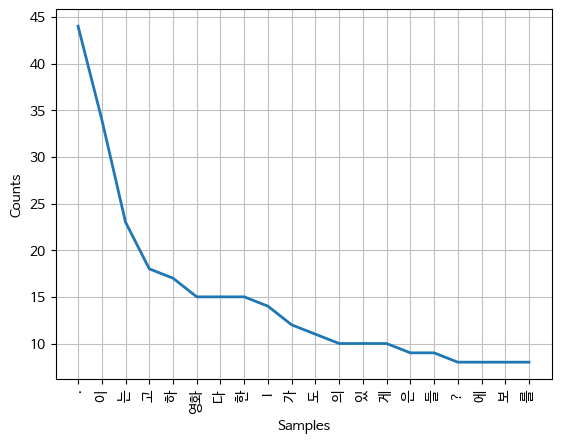

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
positive_dist.plot(20)

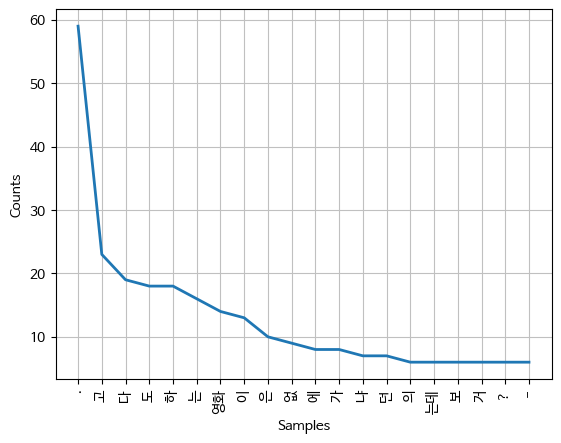

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# 부정(neg)의 단어 빈도표 만들기
negative_dist = FreqDist(reader.words(categories='neg'))
negative_dist.plot(20)

In [ ]:
# 긍정(pos)과 부정(neg) 유형별로 타입-토큰 비율(TTR)을 구하세요
def TTR(words):
  tokens = len(words)
  types = len(set(words))
  return types / tokens

In [ ]:
print('긍정 TTR : ', TTR(reader.words(categories='pos')))
print('부정 TTR : ', TTR(reader.words(categories='neg')))

긍정 TTR :  0.4895833333333333
부정 TTR :  0.5260663507109005


#### 어휘(특징) 선별
* 2음절 이상 단어로만 선택하면 어떨까요? -> 조사와 어미를 빼기 위해(단어만 알고 싶음)

In [ ]:
# 2음절 이상의 긍정의 단어 빈도표
pos_words = reader.words(categories='pos')
long_pos_words = [w for w in pos_words if len(w) > 1]
pos_word_dist = FreqDist(long_pos_words)

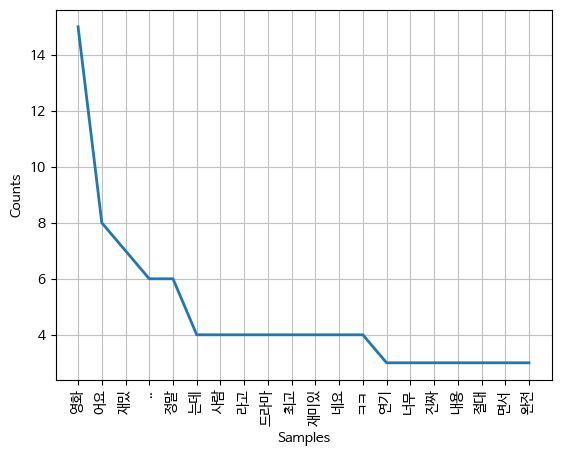

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
pos_word_dist.plot(20)

In [ ]:
# 2음절 이상의 부정의 단어 빈도표
neg_words = reader.words(categories='neg')
long_neg_words = [w for w in neg_words if len(w) > 1]
neg_word_dist = FreqDist(long_neg_words)

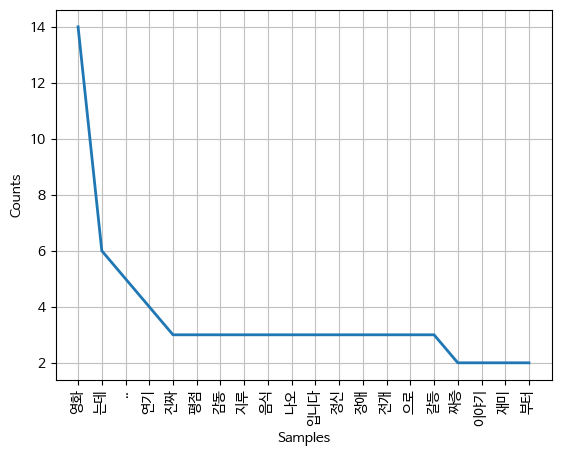

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
neg_word_dist.plot(20)